# ¿Qué es Google Colab?

Google Colab es una plataforma gratuita basada en la nube que permite escribir y ejecutar código en **Python** directamente desde el navegador. Algunas de sus características más importantes son:

- **Notebooks colaborativos**: Similar a Jupyter Notebooks, combina código, texto, imágenes y gráficos en un único documento.
- **Entorno en la nube**: No requiere instalación local, todo se ejecuta en servidores de Google.
- **Acceso a GPUs/TPUs**: Ofrece poderosas GPUs/TPUs gratuitas.
- **Integración con Google Drive**: Fácil acceso y almacenamiento de archivos.

Es ideal para aprendizaje automático, ciencia de datos y más.


# Repositorios de Kaggle

Estas celdas de código están destinadas a trabajar con repositorios de **Kaggle**. Kaggle es una plataforma popular que proporciona datasets, competiciones de ciencia de datos y herramientas para trabajar con **machine learning**. Con el acceso a repositorios de Kaggle, podemos descargar datasets directamente a Google Colab para trabajar en nuestros proyectos.

Recuerda que necesitarás autenticar tu cuenta de Kaggle e importar tu clave API para poder acceder y descargar archivos de Kaggle en tu entorno de trabajo.


In [ ]:

# IMPORTANTE: EJECUTE ESTA CELDA PARA IMPORTAR TUS FUENTES DE DATOS DE KAGGLE
# A LA UBICACIÓN CORRECTA (/kaggle/input) EN TU CUADERNO,
# ENTONCES SIÉNTETE LIBRE DE ELIMINAR ESTA CELDA.
# NOTA: ESTE ENTORNO DEL CUADERNO DIFERENCIA DEL PYTHON DE KAGGLE
# ENTORNO POR LO QUE PUEDE FALTAR BIBLIOTECAS UTILIZADAS POR SU
# COMPUTADORA PORTÁTIL.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'airline-delay-and-cancellation-data-2009-2018:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F297485%2F609497%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241006%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241006T192646Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9e98d618a0f8a2446ebda382b592778b72a574838010edb5a864626ecd32cfaacbba1b5fb33fc574b7677e71aafb428cf28a83beb01bb09bbb66fa915a0a4fa0b2c0df1abd950634588b2528aca22581944b7caa2fb0e96d9f6f74a249adc90bc35ec073ab30da2a080e1a951ba50801d9d1b05ebb63b24aade107636cb83d14e98a5dd5ea38c14459b6cea9eec24ad2cf74b8ff2d79d3a1f09a39fd9990d74c186edf158f84e1efe1be1746d496a083ccd231a8aa82ee0fb2829f0a586fe697d0721908ad47c58de9e9659b6ab64768f50ad1ea806f17a589355b91551c862a21594f1ad20ed9846e8997022ae9a05aa40a097b6002b88a4147371d70cb0a02'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2088672674 bytes downloaded
Downloaded and uncompressed: airline-delay-and-cancellation-data-2009-2018
Data source import complete.


In [ ]:
# Este entorno Python 3 viene con muchas bibliotecas de análisis útiles instaladas
# Está definido por la imagen de Docker de kaggle/python: https://github.com/kaggle/docker-python
# Por ejemplo, aquí hay varios paquetes útiles para cargar

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Los archivos de datos de entrada están disponibles en el directorio de solo lectura "../input/"
# Por ejemplo, ejecutar esto (haciendo clic en ejecutar o presionando Shift+Enter) enumerará todos los archivos en el directorio de entrada

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Puedes escribir hasta 20 GB en el directorio actual (/kaggle/working/) que se conserva como salida cuando creas una versión usando "Guardar y ejecutar todo"
# También puedes escribir archivos temporales en /kaggle/temp/, pero no se guardarán fuera de la sesión actual

/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2013.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2011.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2010.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2015.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2018.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2016.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2012.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2017.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2014.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2009.csv


# Especificación del archivo CSV

En este paso, vamos a **especificar con qué archivo CSV** vamos a trabajar. Asegúrate de que el archivo esté disponible en tu entorno de trabajo y proporciona la ruta correcta hacia el archivo. Esto será crucial para poder leerlo y realizar la conversión al formato Parquet en los pasos siguientes.

`import pandas as pd`

Este comando en Python importa la biblioteca **Pandas**, que es utilizada para la manipulación y análisis de datos estructurados. Te permite trabajar con datos tabulares, leer y escribir archivos CSV, Excel, y más. Pandas es una herramienta esencial para la ciencia de datos y procesamiento de grandes volúmenes de información.

In [ ]:
import pandas as pd

`df = pd.read_csv('/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2011.csv', sep=',')`

Este comando carga un archivo CSV (en este caso, el archivo de datos de retrasos y cancelaciones de aerolíneas de 2011) en un DataFrame de Pandas. El archivo se encuentra en la ruta especificada, y el argumento `sep=','` indica que el separador de los datos en el archivo es una coma. El resultado es que los datos del CSV se organizan en columnas dentro de `df` para ser manipulados y analizados en Python.


In [ ]:
df = pd.read_csv('/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2011.csv', sep=',')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2011.csv'

In [ ]:
# Muestra las primeras filas para ver la estructura.
print(df.head())

NameError: name 'df' is not defined

In [ ]:
# Mostrar los nombres de las columnas y sus tipos de datos.
print(df.dtypes)

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object


`df_parquet= df.to_parquet('airline_data_2011.parquet', engine='pyarrow')`

Este comando convierte el DataFrame `df`, que contiene los datos del archivo CSV previamente cargado, al formato Parquet y lo guarda en un archivo llamado `'airline_data_2011.parquet'`. El argumento `engine='pyarrow'` especifica que se utilizará el motor PyArrow para realizar la conversión. El formato Parquet es ideal para almacenar datos grandes de manera eficiente y comprimida, mejorando el rendimiento de las consultas posteriores.


In [ ]:
# Guardar el DataFrame como un Parquet file
df_parquet= df.to_parquet('airline_data_2011.parquet', engine='pyarrow')

Este bloque de código realiza varias funciones importantes agrupadas en las siguientes secciones:

1. **Cálculo del tamaño del archivo**:
   - Se utiliza `os.path.getsize` para obtener el tamaño del archivo Parquet en bytes.
   - Luego, se convierte ese tamaño a kilobytes (KB), megabytes (MB) y gigabytes (GB) utilizando divisiones sucesivas por 1024.

2. **Medición del tiempo de conversión**:
   - Usando `time.time()`, se mide el tiempo que tarda en convertir el archivo CSV al formato Parquet.
   - Se calcula la diferencia de tiempo entre el inicio y el final de la conversión, y se muestra el resultado en segundos.


In [ ]:
# Para el tamaño de los archivos, puedes comprobarlo en el panel lateral derecho
# de Kaggle dentro de Output, o utilizar el método os.path.getsize(ruta):
import os
# Obtén el tamaño del archivo en bytes
size_in_bytes=os.path.getsize("airline_data_2011.parquet")
# Convertir a kilobytes, megabytes y gigabytes
size_in_kb = size_in_bytes / 1024
size_in_mb = size_in_kb / 1024
size_in_gb = size_in_mb / 1024

print(f"Tamaño del archivo: {size_in_bytes} bytes")
print(f"Tamaño del archivo: {size_in_kb:.2f} KB")
print(f"Tamaño del archivo: {size_in_mb:.2f} MB")
print(f"Tamaño del archivo: {size_in_gb:.2f} GB")

# Respecto al tiempo, por ejemplo puedes obtenerlo así:

import time

#El comando time.time() mide el tiempo en segundos desde el epoch
# (que es el 1 de enero de 1970). Al restar el tiempo de inicio
# (inicio = time.time()) del tiempo final (fin = time.time()),
# obtienes el tiempo transcurrido en segundos.
inicio = time.time()
# operación a medir
df_parquet= df.to_parquet('airline_data_2011.parquet', engine='pyarrow')
fin = time.time()
print(fin - inicio)
print(f"El tiempo quye tarda en convertir a parquet nuestro csv es de: {fin - inicio:.2f} segundos")

Tamaño del archivo: 137156857 bytes
Tamaño del archivo: 133942.24 KB
Tamaño del archivo: 130.80 MB
Tamaño del archivo: 0.13 GB
9.526705503463745
El tiempo quye tarda en convertir a parquet nuestro csv es de: 9.53 segundos


In [ ]:
# Leemos el archivo Parquet
df_parquet = pd.read_parquet("airline_data_2011.parquet")

In [ ]:
# Muestra las columnas del DataFrame
print(df_parquet.columns)

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')


In [ ]:
# Visualizar las primeras filas del archivo Parquet
# Esto nos permite ver las primeras 5 filas del DataFrame para tener una idea de cómo son los datos.
df_parquet.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2011-01-01,MQ,4529,BOS,JFK,1830,1823.0,-7.0,68.0,1931.0,...,90.0,146.0,48.0,187.0,0.0,0.0,49.0,0.0,0.0,NaN
1,2011-01-01,MQ,4532,BNA,DCA,1100,1052.0,-8.0,11.0,1103.0,...,95.0,88.0,74.0,562.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-01,MQ,4532,DCA,JFK,1400,1358.0,-2.0,9.0,1407.0,...,79.0,73.0,60.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-01,MQ,4537,RDU,JFK,1710,1706.0,-4.0,59.0,1805.0,...,105.0,159.0,85.0,426.0,0.0,0.0,50.0,0.0,0.0,NaN
4,2011-01-01,MQ,4540,CMH,LGA,1340,1340.0,0.0,14.0,1354.0,...,105.0,95.0,77.0,478.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filtrar los vuelos cancelados
# Aquí filtramos aquellos vuelos que tienen el valor '1' en la columna 'CANCELLED', lo que significa que fueron cancelados.
vuelos_cancelados = df_parquet[df_parquet['CANCELLED'] == 1]

In [ ]:
# Mostramos las primeras filas de los vuelos cancelados
vuelos_cancelados.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
15,2011-01-01,MQ,4586,MSP,LGA,845,855.0,10.0,NaN,NaN,...,160.0,NaN,NaN,1020.0,NaN,NaN,NaN,NaN,NaN,NaN
30,2011-01-01,MQ,4649,LGA,MSP,1850,NaN,NaN,NaN,NaN,...,180.0,NaN,NaN,1020.0,NaN,NaN,NaN,NaN,NaN,NaN
33,2011-01-01,MQ,4654,LGA,ATL,945,NaN,NaN,NaN,NaN,...,165.0,NaN,NaN,761.0,NaN,NaN,NaN,NaN,NaN,NaN
36,2011-01-01,MQ,4657,ATL,LGA,1300,NaN,NaN,NaN,NaN,...,125.0,NaN,NaN,761.0,NaN,NaN,NaN,NaN,NaN,NaN
37,2011-01-01,MQ,4658,LGA,ATL,1215,NaN,NaN,NaN,NaN,...,155.0,NaN,NaN,761.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calcular el promedio de los retrasos en la llegada
# Calculamos la media de los valores en la columna 'ARR_DELAY', que almacena los minutos de retraso en la llegada de los vuelos.
promedio_retraso_llegada = df_parquet['ARR_DELAY'].mean()
print(f"El promedio de retraso en llegada es: {promedio_retraso_llegada} minutos")

El promedio de retraso en llegada es: 4.767228922157403 minutos


In [ ]:
# Contar el número de vuelos por aeropuerto de origen
# Esto cuenta cuántos vuelos se realizaron desde cada aeropuerto ('ORIGIN').
vuelos_por_origen = df_parquet['ORIGIN'].value_counts()

In [ ]:
# Mostramos el número de vuelos por cada origen
print(vuelos_por_origen)

ORIGIN
ATL    391957
ORD    312754
DFW    259598
DEN    240393
LAX    210066
        ...  
SPN         3
BGM         3
FLO         2
SCE         1
TUP         1
Name: count, Length: 299, dtype: int64


In [ ]:
# Obtener estadísticas generales del DataFrame
# Esta función muestra estadísticas descriptivas como el promedio, la desviación estándar, el valor mínimo y máximo, etc., de las columnas numéricas del DataFrame.
df_parquet.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,6.066650e+06,6.066650e+06,5.954951e+06,5.954951e+06,5.951756e+06,5.951756e+06,5.948090e+06,5.948090e+06,6.066650e+06,5.948090e+06,...,6.066648e+06,5.936210e+06,5.936210e+06,6.066650e+06,1.110531e+06,1.110531e+06,1.110531e+06,1.110531e+06,1.110531e+06,0.0
mean,2.240183e+03,1.328833e+03,1.335503e+03,8.463396e+00,1.530516e+01,1.357759e+03,1.480035e+03,6.737048e+00,1.501225e+03,1.485507e+03,...,1.327230e+02,1.293236e+02,1.072925e+02,7.629165e+02,1.671900e+01,2.335391e+00,1.379727e+01,7.781503e-02,2.257169e+01,NaN
std,1.934743e+03,4.685817e+02,4.805952e+02,3.300183e+01,9.092148e+00,4.817808e+02,5.029620e+02,4.756833e+00,4.861494e+02,5.064156e+02,...,7.075686e+01,7.053071e+01,6.838944e+01,5.723395e+02,4.121051e+01,1.735261e+01,2.645281e+01,2.008697e+00,3.988606e+01,NaN
min,0.000000e+00,1.000000e+00,1.000000e+00,-1.440000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.300000e+01,1.400000e+01,7.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,6.870000e+02,9.280000e+02,9.290000e+02,-5.000000e+00,1.000000e+01,9.430000e+02,1.105000e+03,4.000000e+00,1.118000e+03,1.109000e+03,...,8.100000e+01,7.800000e+01,5.800000e+01,3.420000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,1.614000e+03,1.320000e+03,1.328000e+03,-1.000000e+00,1.300000e+01,1.340000e+03,1.512000e+03,5.000000e+00,1.523000e+03,1.516000e+03,...,1.150000e+02,1.120000e+02,8.900000e+01,6.040000e+02,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,NaN
75%,3.339000e+03,1.724000e+03,1.732000e+03,7.000000e+00,1.800000e+01,1.746000e+03,1.906000e+03,8.000000e+00,1.912000e+03,1.911000e+03,...,1.630000e+02,1.590000e+02,1.360000e+02,9.910000e+02,1.700000e+01,0.000000e+00,1.800000e+01,0.000000e+00,2.900000e+01,NaN
max,8.994000e+03,2.359000e+03,2.400000e+03,1.638000e+03,1.850000e+02,2.400000e+03,2.400000e+03,2.380000e+02,2.400000e+03,2.400000e+03,...,6.650000e+02,7.110000e+02,6.800000e+02,4.963000e+03,1.638000e+03,1.200000e+03,9.760000e+02,3.820000e+02,1.374000e+03,NaN


In [ ]:
# Agrupar los datos por origen y calcular el retraso promedio para cada aeropuerto de origen
# Agrupamos por la columna 'ORIGIN' y calculamos el promedio de la columna 'ARR_DELAY' para cada aeropuerto.
promedio_retraso_por_origen = df_parquet.groupby('ORIGIN')['ARR_DELAY'].mean()
print(promedio_retraso_por_origen)

ORIGIN
ABE     5.985197
ABI     3.939558
ABQ     2.778944
ABY    13.732785
ACK    20.190244
         ...    
WRG    -1.235209
WYS   -12.732342
XNA     7.586471
YAK    -7.182997
YUM     0.101273
Name: ARR_DELAY, Length: 299, dtype: float64


In [ ]:
# Filtrar los vuelos con retrasos mayores a 60 minutos
# Filtramos los vuelos cuya columna 'ARR_DELAY' tenga valores mayores a 60, indicando que tuvieron más de una hora de retraso.
vuelos_retrasados = df_parquet[df_parquet['ARR_DELAY'] > 60]
vuelos_retrasados.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
45,2011-01-01,MQ,4671,ATL,LGA,1900,2213.0,193.0,21.0,2234.0,...,145.0,118.0,93.0,761.0,166.0,0.0,0.0,0.0,0.0,NaN
59,2011-01-01,OO,4439,MSP,MOT,1715,1943.0,148.0,9.0,1952.0,...,95.0,81.0,68.0,449.0,6.0,0.0,0.0,0.0,128.0,NaN
87,2011-01-01,OO,6471,BFL,SFO,1701,1831.0,90.0,12.0,1843.0,...,76.0,90.0,71.0,238.0,0.0,0.0,14.0,0.0,90.0,NaN
88,2011-01-01,OO,6471,SFO,BFL,1512,1702.0,110.0,13.0,1715.0,...,74.0,67.0,49.0,238.0,54.0,0.0,0.0,0.0,49.0,NaN
97,2011-01-01,OO,6428,BOI,LAX,1116,1228.0,72.0,13.0,1241.0,...,127.0,116.0,96.0,674.0,0.0,0.0,0.0,0.0,61.0,NaN


In [ ]:
# Contar los vuelos por aerolínea
# Contamos cuántos vuelos realizó cada aerolínea ('OP_CARRIER').
vuelos_por_aerolinea = df_parquet['OP_CARRIER'].value_counts()
print(vuelos_por_aerolinea)

OP_CARRIER
WN    1153939
DL     729477
OO     585142
AA     536689
MQ     447275
XE     411427
US     408151
EV     326858
UA     309898
FL     247982
CO     244781
B6     214715
YV     155665
AS     143250
F9      84890
HA      66511
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


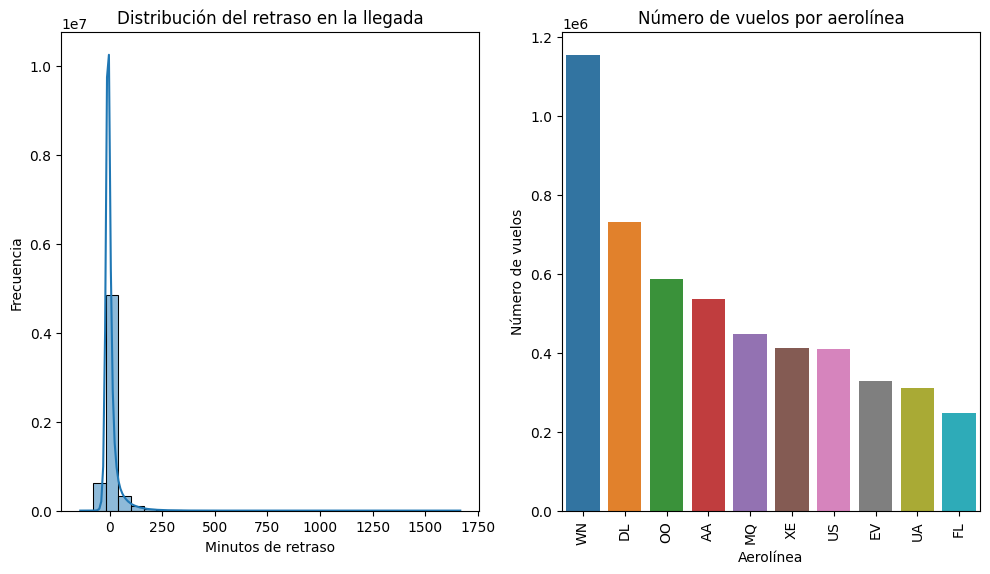

In [ ]:
# Histograma del retraso en la llegada:
# Se visualiza la distribución de los retrasos en la llegada con un histograma,
# añadiendo una curva KDE (Densidad Kernel) para ver mejor la distribución.
# Gráfico de barras para el número de vuelos por aerolínea:
# Muestra el número de vuelos por aerolínea, limitando la visualización a las
# 10 aerolíneas más comunes en los datos.
#
# Importamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertimos valores infinitos en NaN
df_parquet = df_parquet.replace([float('inf'), float('-inf')], pd.NA)

# Aumentamos el tamaño de los gráficos
plt.figure(figsize=(10, 6))

# Histograma del retraso en la llegada (ARR_DELAY)
plt.subplot(1, 2, 1)
sns.histplot(df_parquet['ARR_DELAY'].dropna(), bins=30, kde=True)
plt.title('Distribución del retraso en la llegada')
plt.xlabel('Minutos de retraso')
plt.ylabel('Frecuencia')

# Gráfico de barras para vuelos por aerolínea
plt.subplot(1, 2, 2)
vuelos_por_aerolinea = df_parquet['OP_CARRIER'].value_counts().head(10)  # Mostrar las 10 aerolíneas más frecuentes
sns.barplot(x=vuelos_por_aerolinea.index, y=vuelos_por_aerolinea.values)
plt.title('Número de vuelos por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de vuelos')
plt.xticks(rotation=90)

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

# Resumen de todo lo anterioe en los referente a la Conversión de CSV a Parquet

Ahora vamos a empezar a trabajar con **Python** para realizar el ejercicio de conversión de un archivo en formato **CSV** a formato **Parquet**. El formato Parquet es altamente eficiente en términos de almacenamiento y velocidad de acceso, por lo que es ideal para grandes conjuntos de datos. Este ejercicio implicará la lectura de un archivo CSV, su transformación y almacenamiento en formato Parquet.


In [ ]:
import pandas as pd
import time
import os

# Cargar el archivo CSV
df_ejercicio = pd.read_csv('/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2011.csv', sep=',')

# Medir el tiempo de inicio
inicio = time.time()

# Convertir el DataFrame a formato Parquet
df_ejercicio.to_parquet('airline_data_2011.parquet', engine='pyarrow')

# Medir el tiempo final
fin = time.time()

# Calcular el tiempo transcurrido
tiempo_transcurrido = fin - inicio

# Obtener el tamaño del archivo CSV en MB
tamanio_csv = os.path.getsize("/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2011.csv") / (1024**2)

# Obtener el tamaño del archivo Parquet en MB
tamanio_parquet = os.path.getsize("airline_data_2011.parquet") / (1024**2)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Métrica": ["Tiempo de conversión (s)","Tamaño del archivo CSV (MB)","Tamaño del archivo Parquet (MB)"],
    "Valor": [f"{tiempo_transcurrido:.2f} segundos",f"{tamanio_csv:.4f} MB", f"{tamanio_parquet:.4f} MB"]
})

# Mostrar la tabla con los resultados
resultados


,Métrica,Valor
0,Tiempo de conversión (s),9.28 segundos
1,Tamaño del archivo CSV (MB),712.2602 MB
2,Tamaño del archivo Parquet (MB),130.8030 MB


# Conversión de CSV a Parquet utilizando script en BASH

Ahora vamos a empezar a trabajar con **bash** para realizar el ejercicio de conversión de un archivo en formato **CSV** a formato **Parquet**. El formato Parquet es altamente eficiente en términos de almacenamiento y velocidad de acceso, por lo que es ideal para grandes conjuntos de datos. Este ejercicio implicará la lectura de un archivo CSV, su transformación y almacenamiento en formato Parquet.


In [ ]:
%%bash
# Ruta a los archivos CSV y Parquet
csv_file="/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2011.csv"
parquet_file="airline_data_2011.parquet"

# Obtener el tamaño del archivo CSV en MB
csv_size=$(du -m "$csv_file" | cut -f1)

# Obtener el tamaño del archivo Parquet en MB
parquet_size=$(du -m "$parquet_file" | cut -f1)

# Medir el tiempo de conversión (simulado)
start_time=$(date +%s)
# Aquí deberías colocar el comando real de conversión CSV -> Parquet (ej. pandas en Python)
sleep 2  # Simula la conversión
end_time=$(date +%s)
conversion_time=$((end_time - start_time))

# Mostrar la tabla con los resultados
echo -e "Métrica\t\t\tValor"
echo -e "-----------------------------------------"
echo -e "Tiempo de conversión (s)\t$conversion_time segundos"
echo -e "Tamaño del archivo CSV (MB)\t$csv_size MB"
echo -e "Tamaño del archivo Parquet (MB)\t$parquet_size MB"


Métrica			Valor
-----------------------------------------
Tiempo de conversión (s)	2 segundos
Tamaño del archivo CSV (MB)	713 MB
Tamaño del archivo Parquet (MB)	131 MB


# Conversión de CSV a Parquet utilizando lenguaje R

El lenguaje de programación R es un entorno y lenguaje de programación de software libre, especialmente diseñado para el análisis estadístico y la manipulación de datos. Fue desarrollado inicialmente por Robert Gentleman y Ross Ihaka en 1993 en la Universidad de Auckland, Nueva Zelanda, como una reimplementación del lenguaje S, con influencias de Scheme.

### Características Principales:
- **Multiparadigma**: R soporta múltiples paradigmas de programación, incluyendo funcional, vectorial, imperativo, procedural y orientado a objetos.
- **Estadística y Gráficos**: R incluye un extenso catálogo de métodos estadísticos y gráficos, como regresión lineal, series de tiempo, inferencia estadística, y algoritmos de aprendizaje automático.
- **Bibliotecas y Paquetes**: R cuenta con una amplia gama de bibliotecas y paquetes especializados para el procesamiento, visualización y modelado de datos. CRAN (Comprehensive R Archive Network) es el repositorio principal donde se alojan estos paquetes.
- **Interactividad y Visualización**: R es conocido por sus capacidades de visualización de datos, permitiendo la creación de gráficos de alta calidad y personalizados.
- **Multiplataforma**: Está disponible para sistemas operativos Windows, macOS, Unix y Linux.

### Usos Comunes:
- **Análisis de Datos**: R es ampliamente utilizado en la investigación científica, econometría, bioinformática, y en la inferencia estadística.
- **Big Data y Machine Learning**: R es popular en el campo del Big Data y el aprendizaje automático debido a sus potentes herramientas de análisis y modelado.
- **Investigación y Educación**: Es una herramienta esencial en la academia para la enseñanza de estadística y análisis de datos.

### Ventajas:
- **Software Libre**: R es de código abierto y gratuito, lo que permite a los usuarios modificar y adaptar el código a sus necesidades.
- **Comunidad Activa**: R tiene una comunidad global activa que contribuye al desarrollo de paquetes y ofrece soporte a través de foros y listas de correo.
- **Flexibilidad**: La capacidad de R para integrarse con otros lenguajes de programación y herramientas (como Python, SQL, y Hadoop) lo hace extremadamente flexible y adaptable a diferentes entornos de trabajo.

### Historia y Desarrollo:
- **Origen**: Desarrollado en 1993 por Robert Gentleman y Ross Ihaka.
- **Evolución**: Desde su creación, R ha evolucionado significativamente, con contribuciones de un equipo central de desarrollo y una comunidad global.
- **Influencia**: R ha influido en otros lenguajes y herramientas de análisis de datos, como Julia y Gretl.

R es una herramienta poderosa y versátil para el análisis de datos y la estadística, ampliamente utilizada en la investigación científica y en la industria. Su capacidad para manejar grandes volúmenes de datos y realizar análisis complejos lo convierte en una opción preferida para muchos profesionales y académicos.

Ahora vamos a empezar a trabajar con **R** para realizar el ejercicio de conversión de un archivo en formato **CSV** a formato **Parquet**. El formato Parquet es altamente eficiente en términos de almacenamiento y velocidad de acceso, por lo que es ideal para grandes conjuntos de datos. Este ejercicio implicará la lectura de un archivo CSV, su transformación y almacenamiento en formato Parquet.


In [ ]:
!apt-get install r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.


In [ ]:
# Instalar arrow para trabajar con Parquet
!apt-get install r-cran-arrow

# Instalar dplyr para manipulación de datos
!apt-get install r-cran-dplyr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-cran-arrow is already the newest version (17.0.0.1-1.ca2204.1).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-cran-dplyr is already the newest version (1.1.4-1.ca2204.1).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
# Cargar librerías necesarias
library(arrow)
library(dplyr)

# Medir el tiempo de inicio
start_time <- Sys.time()

# Cargar el archivo CSV
df_ejercicio <- read.csv('/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2011.csv')

# Convertir el DataFrame a formato Parquet
write_parquet(df_ejercicio, 'airline_data_2011.parquet')

# Medir el tiempo final
end_time <- Sys.time()
time_taken <- end_time - start_time

# Obtener el tamaño del archivo CSV en MB
tamanio_csv <- file.info("/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2011.csv")$size / (1024^2)

# Obtener el tamaño del archivo Parquet en MB
tamanio_parquet <- file.info("airline_data_2011.parquet")$size / (1024^2)

# Crear un data.frame con los resultados
resultados <- data.frame(
  Métrica = c("Tiempo de conversión (s)", "Tamaño del archivo CSV (MB)", "Tamaño del archivo Parquet (MB)"),
  Valor = c(time_taken, tamanio_csv, tamanio_parquet)
)

# Mostrar los resultados
print(resultados)

                          Métrica           Valor
1        Tiempo de conversión (s)   1.395109 mins
2     Tamaño del archivo CSV (MB) 712.260189 mins
3 Tamaño del archivo Parquet (MB) 130.837948 mins
